<a href="https://colab.research.google.com/github/AndrejaGojic/rusu7/blob/main/LV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9928 - accuracy: 0.7047
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - 

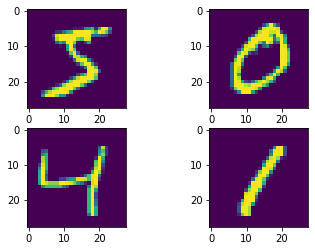

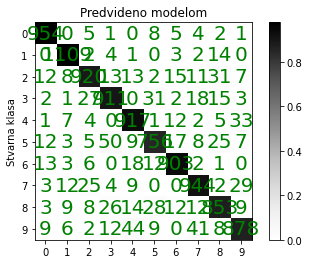

INFO:tensorflow:Assets written to: CNN/assets


In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(x_train[0])
axarr[0,1].imshow(x_train[1])
axarr[1,0].imshow(x_train[2])
axarr[1,1].imshow(x_train[3])

# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)


# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu

model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
#flatten
model.add(layers.Flatten())
#dense relu
#dens softmax
model.add(layers.Dense(units=10, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()

# TODO: definiraj karakteristike procesa ucenja pomocu .compile()

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# TODO: provedi ucenje mreze

model.fit(x_train_s, y_train_s, epochs=5, batch_size=32)

# TODO: Prikazi test accuracy i matricu zabune

loss_and_metrics = model.evaluate(x_test_s, y_test_s, batch_size=128)
print(loss_and_metrics)
predict = model.predict(x_test_s, batch_size=128)

for i in predict:
  for j in range(len(i)):
    if(np.max(i)==i[j]):
      i[j]=1
    else:
      i[j]=0


conf_matrix=confusion_matrix(y_test_s.argmax(axis=1),predict.argmax(axis=1))
plot_confusion_matrix(conf_matrix)

# TODO: spremi model

model.save("CNN/")

Cloning into 'clone'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  from ipykernel import kernelapp as app


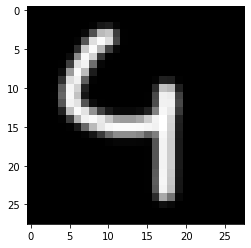

[1.2528396e-06 4.1557627e-04 1.2637506e-03 1.9751135e-03 9.3062311e-01
 3.1327730e-04 1.4469571e-03 1.4251077e-03 3.8810034e-04 6.2147867e-02]
0.9306231
------------------------
4


In [11]:
!rm -rf clone && git clone https://github.com/AndrejaGojic/rusu7 clone && cp -a clone/. .

from keras.preprocessing.image import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import matplotlib.image as mpimg
import numpy as np
from tensorflow import keras

filename = 'test.png'

img = mpimg.imread(filename)
img = color.rgb2gray(img)
img = resize(img, (28, 28))


plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')


# TODO: ucitaj model

model = load_model("CNN/")

# TODO: napravi predikciju 

p=model.predict(img)
print(p[0])
max=np.max(p)
print(max)

for i in range (len(p[0])):

  if(max==p[0][i]):
    max_i=i

# TODO: ispis rezultat
print("------------------------")
print(max_i)